## Test DQN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gym import Env
from gym.spaces import Discrete, Box
from gym import spaces
import numpy as np
import random
import gym
import pandas as pd
import seaborn as sns
import time
import logging
import threading
from threading import Thread
import queue
import matplotlib.pyplot as plt
import shutil
import pickle
from queue import PriorityQueue
import copy
#for drop size detection
import cv2
import json
import os
from detectron2.utils.visualizer import ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
#for flood detection
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from opcua import Client
import time as time
from opcua import ua
from datetime import datetime

In [2]:

def flood_detect(path):
    test = image.load_img(path)
    #im1 = test.crop((380, 150, 1550, 950))
    #im1 = test.crop((690, 150, 1300, 950))
    im1 = test.crop((840, 50, 1200, 850)) #change 13.01.22
    #display(im1)
    test_image = im1.resize((224,224))
    display(test_image)
    #test_image = image.load_img(path, target_size=(224, 224))
    test_image = image.img_to_array(test_image)
    test_image = test_image / 255
    test_image = np.expand_dims(test_image, axis=0)
    result = cnn.predict(test_image)
    return result

def drop_size_detect(path):
    #cfg = get_cfg()
    #cfg.merge_from_file("C:/Users/marvi/sciebo/Masterarbeit/Python Programme/Alam Programme/config.yml")
    # path to the model we just trained
    #cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "C:/Users/marvi/sciebo/Masterarbeit/Python Programme/Alam Programme/model_final.pth")
    #cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25  # set a custom testing threshold
    #cfg.MODEL.DEVICE='cuda'
    test = image.load_img(path)
    im1 = test.crop((840, 50, 1200, 850))
    test_image = image.img_to_array(im1)
    predictor = DefaultPredictor(cfg)
    #start_time = time.time()
    outputs5 = predictor(test_image)

    #v = Visualizer(test[:, :, ::-1],scale=1,instance_mode=ColorMode.IMAGE_BW)
    # remove the colors of unsegmented pixels. This option is only available for segmentation models
                   
    #out5 = v.draw_instance_predictions(outputs5["instances"].to("cpu"))
    #img = out5.get_image()[:, :, ::-1]
    #cv2.imshow('view', img)
    #cv2.waitKey()
    #cv2.imwrite('C:/Users/SABUJ/Desktop/test/publicpreview.jpg', img)

    shape = outputs5["instances"].pred_boxes
    np_arr = shape.tensor.cpu().detach().numpy()
    x1 = (np_arr[:, 0])
    y1 = (np_arr[:, 1])
    x2 = (np_arr[:, 2])
    y2 = (np_arr[:, 3])

    dia_px = np.subtract(x2, x1)
    dia_py = np.subtract(y2, y1)
    droplet_mean = (dia_px+dia_py)/2
    mm = droplet_mean / 14
    #print('standard deviation =', np.around(
    #    np.std(mm, dtype=np.float64), decimals=1))
    #print('Droplets size =', np.around(mm, decimals=2), 'mm')
    #print('Avg. Diameter of Droplets =', np.around(
    #    np.average(mm), decimals=1), 'mm')
    
    n, bins, patches = plt.hist(mm, bins=[0, 0.5 ,1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
    sorted_n = -np.sort(-n)
    imp_bins = []
    for t in range(len(n)):
        if sum(imp_bins) < 0.8*np.sum(n):
            imp_bins.append(sorted_n[t])
            
    drop_size_mean_imp = []
    p = -1
    for item in np.digitize(mm,bins):
        #print(item)
        p += 1
        for t in range(len(imp_bins)):
            bins_2 = np.where(n==imp_bins[t])
            bins_2 = bins_2[0][0]
            #print(bins_2)
            if item-1 == bins_2:
                drop_size_mean_imp.append(mm[p])
    
    drop_size_mean = np.mean(drop_size_mean_imp)
    return drop_size_mean

def get_data_2(path):
    flood = []
    drop = []
    destination = 'W:/Studenten/_Studenten Schwing/control_processed'
    files = os.listdir(path)

    if len(files)!=0:
        for file in files:
            if file!='Thumbs.db':
                image_name = path+file
                flooding = flood_detect(image_name)
                drop_size = drop_size_detect(image_name)
                flood.append(flooding)
                drop.append(drop_size)
                shutil.move(image_name,destination)
            
    return flood, drop




        

WaterINSize= 0.0
WaterINSize= 30.0
level control: starting...
Control: Starting...
level control: WaterOut 15.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 15.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 15.0


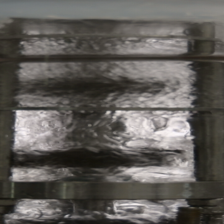

level control: WaterOut 15.0
Main: sleeping....


c:\users\smmyschw\desktop\detectron2-master\detectron2\layers\wrappers.py:240: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


level control: WaterOut 36.0


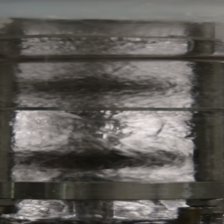

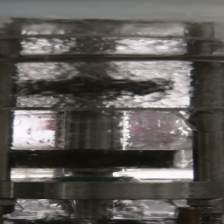

Control: Start State: rpm: 550, solvent: 35
Control: flooding (0)/regular (1): 1, drop size: 1.22
Control: Action step 0
[  1.21631622   1.         550.          35.        ]
[[0.60815811 1.         0.91666667 1.        ]]
Action: 0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 15.0


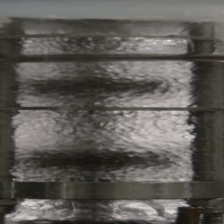

level control: WaterOut 36.0


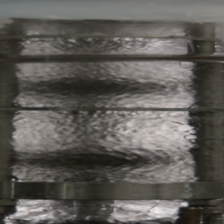

Main: sleeping....


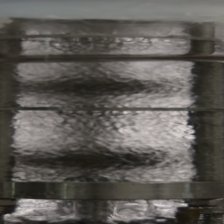

Control: rpm: 500, solvent: 35
Control: flooding (0)/regular (1): 1, drop size: 1.08
Control: Action step 1
[  1.07943094   1.         500.          35.        ]
[[0.53971547 1.         0.83333333 1.        ]]
Action: 11
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 15.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0


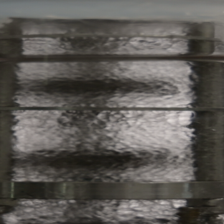

Main: sleeping....
level control: WaterOut 36.0


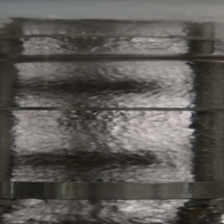

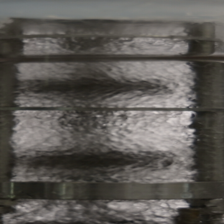

Control: rpm: 500, solvent: 33
Control: flooding (0)/regular (1): 1, drop size: 1.11
Control: Action step 2
[  1.10636795   1.         500.          33.        ]
[[0.55318397 1.         0.83333333 0.94285714]]
Action: 0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 15.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0


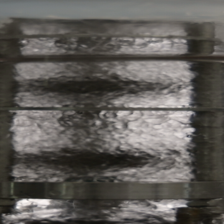

level control: WaterOut 36.0
Main: sleeping....


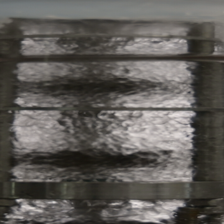

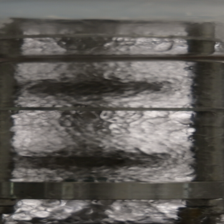

Control: rpm: 450, solvent: 33
Control: flooding (0)/regular (1): 1, drop size: 1.33
Control: Action step 3
[  1.32974684   1.         450.          33.        ]
[[0.66487342 1.         0.75       0.94285714]]
Action: 7
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....


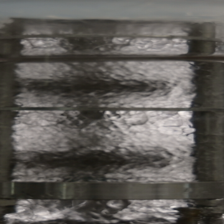

level control: WaterOut 36.0


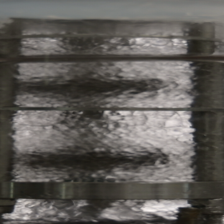

level control: WaterOut 36.0
Main: sleeping....


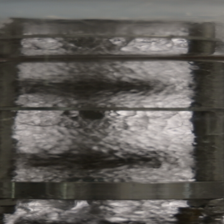

Control: rpm: 470, solvent: 33
Control: flooding (0)/regular (1): 1, drop size: 1.14
Control: Action step 4
[  1.13749933   1.         470.          33.        ]
[[0.56874967 1.         0.78333333 0.94285714]]
Action: 12
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 15.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 15.0


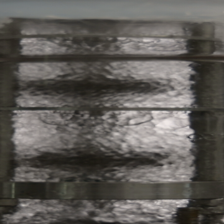

Main: sleeping....
level control: WaterOut 15.0


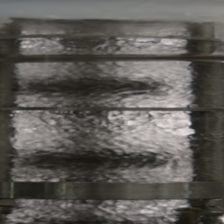

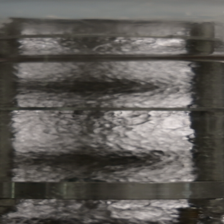

Control: rpm: 470, solvent: 32
Control: flooding (0)/regular (1): 1, drop size: 1.24
Control: Action step 5
[  1.24013746   1.         470.          32.        ]
[[0.62006873 1.         0.78333333 0.91428571]]
Action: 12
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 15.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 15.0
Main: sleeping....


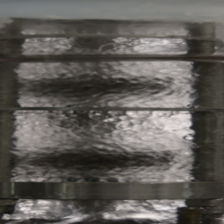

level control: WaterOut 15.0


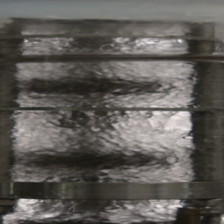

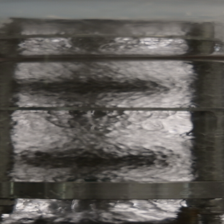

Control: rpm: 470, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.2
Control: Action step 6
[  1.2045722   1.        470.         31.       ]
[[0.6022861  1.         0.78333333 0.88571429]]
Action: 2
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0


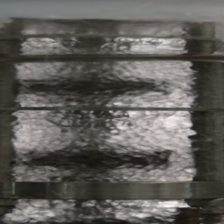

Main: sleeping....


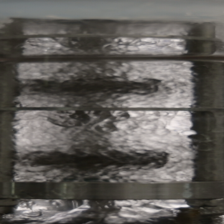

level control: WaterOut 15.0


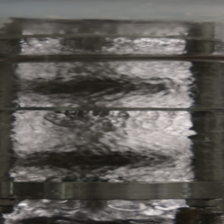

Control: rpm: 440, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.39
Control: Action step 7
[  1.38947594   1.         440.          31.        ]
[[0.69473797 1.         0.73333333 0.88571429]]
Action: 7
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0


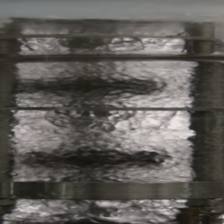

level control: WaterOut 36.0
Main: sleeping....


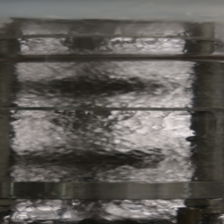

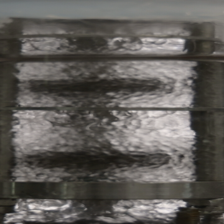

Control: rpm: 460, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.24
Control: Action step 8
[  1.24329579   1.         460.          31.        ]
[[0.62164789 1.         0.76666667 0.88571429]]
Action: 7
level control: WaterOut 15.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....


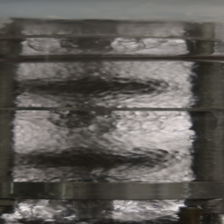

level control: WaterOut 36.0


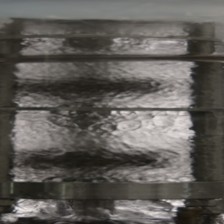

level control: WaterOut 36.0
Main: sleeping....


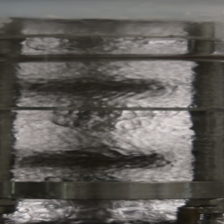

Control: rpm: 480, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.55
Control: Action step 9
[  1.54891169   1.         480.          31.        ]
[[0.77445585 1.         0.8        0.88571429]]
Action: 7
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 15.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 36.0


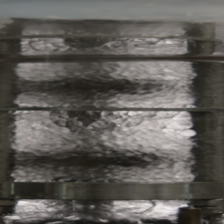

level control: WaterOut 36.0


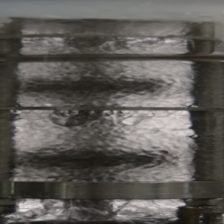

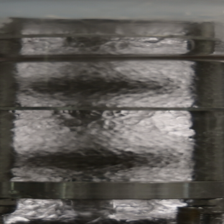

Control: rpm: 500, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.17
Control: Action step 10
[  1.17113674   1.         500.          31.        ]
[[0.58556837 1.         0.83333333 0.88571429]]
Action: 2
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....


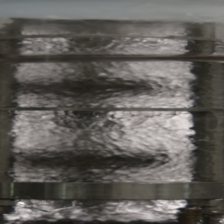

level control: WaterOut 15.0


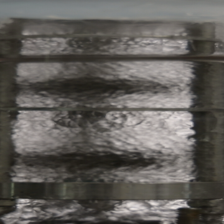

level control: WaterOut 15.0


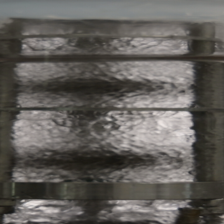

Control: rpm: 470, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.14
Control: Action step 11
[  1.14405513   1.         470.          31.        ]
[[0.57202756 1.         0.78333333 0.88571429]]
Action: 2
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....


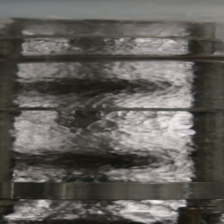

level control: WaterOut 15.0
level control: WaterOut 15.0


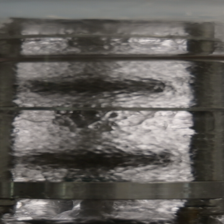

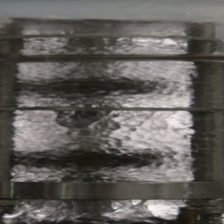

Main: sleeping....
Control: rpm: 440, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.28
Control: Action step 12
[  1.28306186   1.         440.          31.        ]
[[0.64153093 1.         0.73333333 0.88571429]]
Action: 7
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0


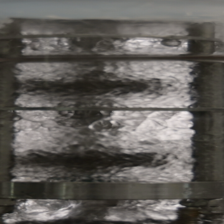

level control: WaterOut 36.0
Main: sleeping....


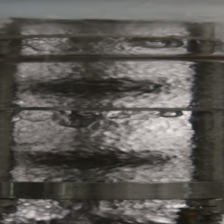

level control: WaterOut 36.0


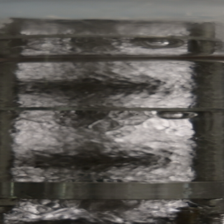

Control: rpm: 460, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.34
Control: Action step 13
[  1.34108579   1.         460.          31.        ]
[[0.6705429  1.         0.76666667 0.88571429]]
Action: 7
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 15.0


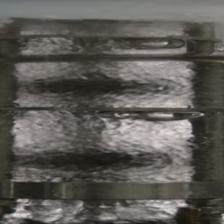

level control: WaterOut 36.0
Main: sleeping....


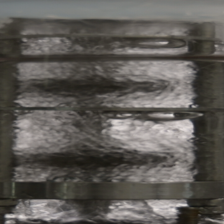

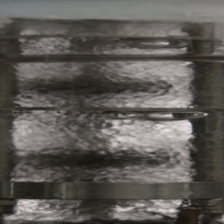

level control: WaterOut 36.0
Control: rpm: 480, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.41
Control: Action step 14
[  1.41075575   1.         480.          31.        ]
[[0.70537788 1.         0.8        0.88571429]]
Action: 7
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 15.0


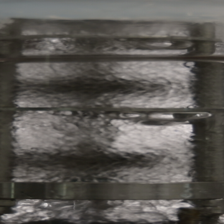

level control: WaterOut 15.0


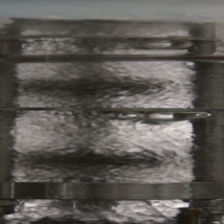

Main: sleeping....


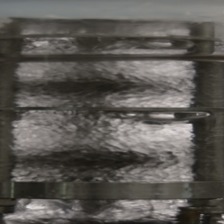

Control: rpm: 500, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.39
Control: Action step 15
[  1.38513887   1.         500.          31.        ]
[[0.69256943 1.         0.83333333 0.88571429]]
Action: 2
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....


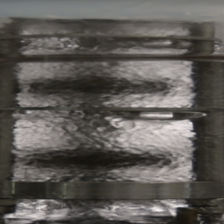

level control: WaterOut 15.0


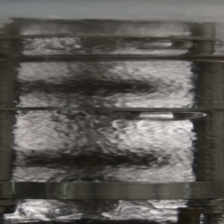

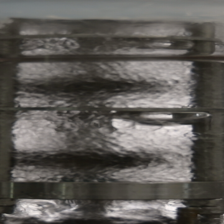

level control: WaterOut 15.0
Main: sleeping....
Control: rpm: 470, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.26
Control: Action step 16
[  1.25954115   1.         470.          31.        ]
[[0.62977058 1.         0.78333333 0.88571429]]
Action: 7
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0


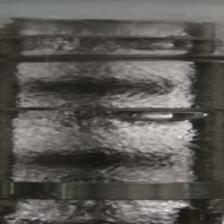

level control: WaterOut 36.0


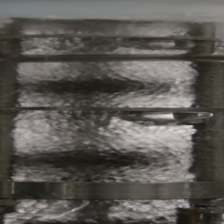

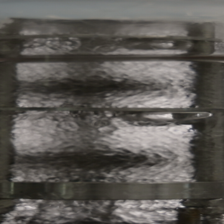

Control: rpm: 490, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.45
Control: Action step 17
[  1.4456681   1.        490.         31.       ]
[[0.72283405 1.         0.81666667 0.88571429]]
Action: 7
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 15.0
level control: WaterOut 36.0
Main: sleeping....


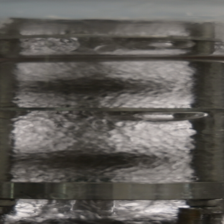

level control: WaterOut 36.0
level control: WaterOut 36.0


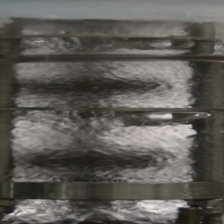

Main: sleeping....


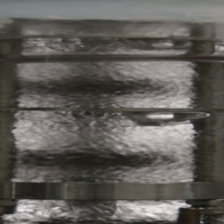

Control: rpm: 510, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.5
Control: Action step 18
[  1.49748576   1.         510.          31.        ]
[[0.74874288 1.         0.85       0.88571429]]
Action: 7
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 36.0


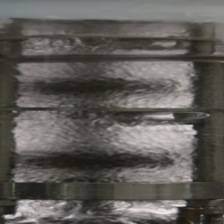

level control: WaterOut 36.0


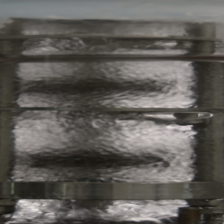

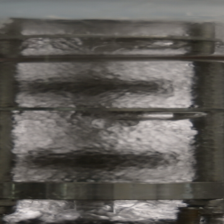

Control: rpm: 530, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.14
Control: Action step 19
[  1.13531399   1.         530.          31.        ]
[[0.56765699 1.         0.88333333 0.88571429]]
Action: 0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 15.0


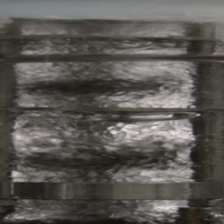

Main: sleeping....
level control: WaterOut 15.0


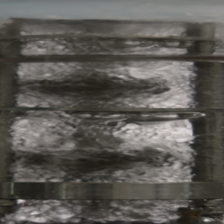

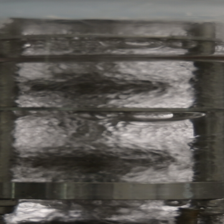

Control: rpm: 480, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.37
Control: Action step 20
[  1.366588   1.       480.        31.      ]
[[0.683294   1.         0.8        0.88571429]]
Action: 7
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 15.0
level control: WaterOut 15.0
Main: sleeping....
level control: WaterOut 15.0


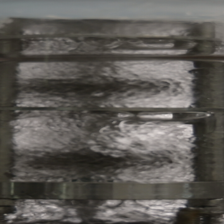

level control: WaterOut 15.0
Main: sleeping....


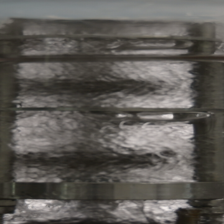

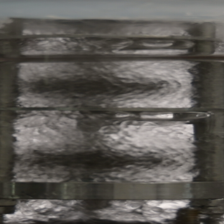

level control: WaterOut 15.0
Control: rpm: 500, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.27
Control: Action step 21
[  1.26598358   1.         500.          31.        ]
[[0.63299179 1.         0.83333333 0.88571429]]
Action: 2
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 15.0


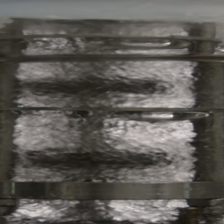

level control: WaterOut 15.0


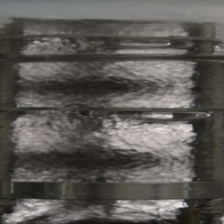

Main: sleeping....


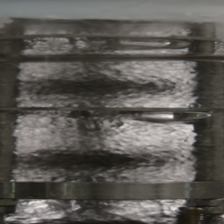

Control: rpm: 470, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.08
Control: Action step 22
[  1.07732534   1.         470.          31.        ]
[[0.53866267 1.         0.78333333 0.88571429]]
Action: 2
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....


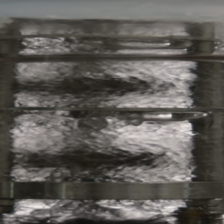

level control: WaterOut 15.0


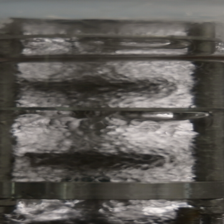

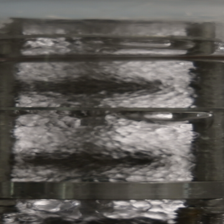

level control: WaterOut 15.0
Main: sleeping....
Control: rpm: 440, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.24
Control: Action step 23
[  1.23883402   1.         440.          31.        ]
[[0.61941701 1.         0.73333333 0.88571429]]
Action: 7
level control: WaterOut 36.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0


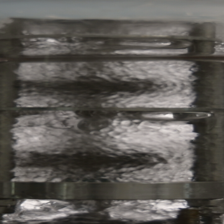

level control: WaterOut 15.0


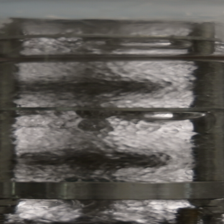

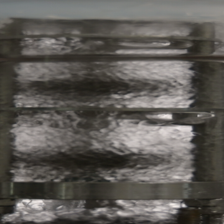

Control: rpm: 460, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.23
Control: Action step 24
[  1.23179018   1.         460.          31.        ]
[[0.61589509 1.         0.76666667 0.88571429]]
Action: 7
Main: sleeping....
level control: WaterOut 15.0
level control: WaterOut 36.0
Main: sleeping....
level control: WaterOut 36.0
level control: WaterOut 36.0


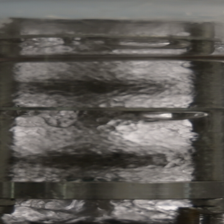

Main: sleeping....
level control: WaterOut 36.0


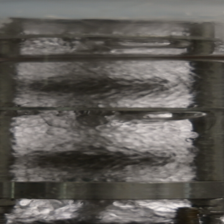

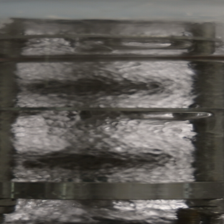

level control: WaterOut 36.0
Control: rpm: 480, solvent: 31
Control: flooding (0)/regular (1): 1, drop size: 1.2


Exception in thread Control:
Traceback (most recent call last):
  File "C:\Users\smmyschw\Anaconda3\envs\myenv\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\smmyschw\AppData\Local\Temp/ipykernel_17644/237823518.py", line 221, in run
    self.results = Q_table
NameError: name 'Q_table' is not defined



Main: sleeping....
level control: ending...
threads closed


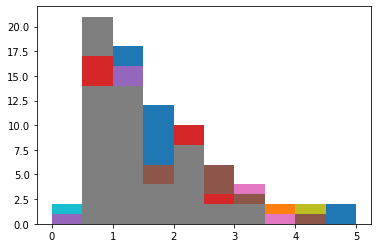

In [3]:
class level_control(threading.Thread):
    def __init__(self, name):
        threading.Thread.__init__(self)
        self.name = name

    def run(self):
        global connected
        global main_running
        print('level control: starting...')
        while main_running == True:
            logging.info('level control: starting...')
            
            while connected == True:
                time.sleep(1)
            connected = True
            client.connect()
            
            lowLevel = client.get_node(("ns=4;s=|var|WAGO 750-8212 PFC200 G2 2ETH RS.Application.GVL_IO.LL_Visu"))
            ll = lowLevel.get_value()
            highLevel = client.get_node(("ns=4;s=|var|WAGO 750-8212 PFC200 G2 2ETH RS.Application.GVL_IO.HL_Visu"))
            hl = highLevel.get_value()
            WaterOut = client.get_node(("ns=4;s=|var|WAGO 750-8212 PFC200 G2 2ETH RS.Application.GVL.Water_Out_SET_Service"))
            WaterIN = client.get_node(("ns=4;s=|var|WAGO 750-8212 PFC200 G2 2ETH RS.Application.GVL_IO.PID_SETPOINT_WATER_IN"))
            WI = WaterIN.get_value()
  
            if (ll == False) and (hl == False):
                WaterOut.set_value(ua.DataValue(ua.Variant(1.4*WI, ua.VariantType.Float)))
            elif ll==False and hl == True:
                WaterOut.set_value(ua.DataValue(ua.Variant(1.2*WI, ua.VariantType.Float)))
            elif ll==True and hl == True:
                WaterOut.set_value(ua.DataValue(ua.Variant(0.5*WI, ua.VariantType.Float)))
    
            logging.info('level control: WaterOut {}'.format(WaterOut.get_value()))
            print('level control: WaterOut {}'.format(WaterOut.get_value()))
            client.disconnect()
            connected = False
            time.sleep(5)
        logging.info('level control: ending...')
        print('level control: ending...')
        
class control_column(threading.Thread):
    def __init__(self, name):
        threading.Thread.__init__(self)
        self.name = name  
        self.results = []
    def run(self):
        format = "%(asctime)s: %(message)s"
        logging.basicConfig(format=format, level=logging.INFO, datefmt="%H:%M:%S")
        logging.info('Control: Starting...')
        print('Control: Starting...')
        DQN = tf.keras.models.load_model(r'W:\Studenten\_Studenten Schwing\Finale genutzt in Kapitel 5_2\DQN_old_env2022_04_25 12_39.h5')
        #alpha = 0.9
        #gamma = 0.9
        start_rpm = 550
        start_solvent = 35
        wanted_size = 1
        
        #global Q_table
        #with open('Q_value_table_rew_60_20_20_100_gamma_90_epi_50000 26_01_22_2.pkl', 'rb') as f:
        #    Q_table = pickle.load(f)
        t = 1
        drops = []
        #for state in Q_table['Q_value']:
        #    if np.array_equal(state, np.zeros(16)) == True:
                #print(state)
                #print('state {}'.format(t))
        #        drops.append('state {}'.format(t))
        #    t += 1
        #Q_table = Q_table.drop(drops)
        #print(Q_table)
        global connected
        global main_running
        main_running = True
        
        while connected == True:
            time.sleep(1)
        connected = True
        client.connect()
        #change stirrer
        Stirrer1 = client.get_node(("ns=4;s=|var|WAGO 750-8212 PFC200 G2 2ETH RS.Application.GVL.Stirrer_SET_RPM_Service"))
        Stirrer1.set_value(ua.DataValue(ua.Variant(start_rpm, ua.VariantType.Float)))
        #change solvent
        OrganicIN = client.get_node(("ns=4;s=|var|WAGO 750-8212 PFC200 G2 2ETH RS.Application.GVL.Organic_SET_Service"))
        OrganicIN.set_value(ua.DataValue(ua.Variant(start_solvent, ua.VariantType.Float)))
        
        client.disconnect()
        connected = False
        time.sleep(10)

        for p in range(3):
            camera = cv2.VideoCapture(0)
            check, frame = camera.read()
            img_counter = len(os.listdir('W:/Studenten/_Studenten Schwing/control_processed/'))+p
            img_name = "{}_rpm_{}_solvent_{}_initial_state.png".format(img_counter, start_rpm, start_solvent)
            save_pic_path = "W:/Studenten/_Studenten Schwing/control/"
            file = save_pic_path + img_name
            time.sleep(1)
            cv2.imwrite(file, frame)
            time.sleep(2)

        camera.release()
        #evaluate picture
        files = os.listdir('W:/Studenten/_Studenten Schwing/control/')

        while len(files) < 3:
            time.sleep(0.5)

        flood, drop = get_data_2(save_pic_path)

        flood_mean = [0,0]
        drop_mean = []
        for u in range(3):
            flood_mean[0] += flood[u][0][0]
            flood_mean[1] += flood[u][0][1]
            if drop[u] > 0:
                drop_mean.append(drop[u])

        droplet = np.mean(drop_mean)
        #print(np.round(droplet,2))
        
        print('Control: Start State: rpm: {}, solvent: {}'.format(start_rpm, start_solvent))
        print('Control: flooding (0)/regular (1): {}, drop size: {}'.format(np.argmax(flood_mean), round(float(droplet),2)))
        
        extr_course.append({'drop_size': droplet, 'state': np.argmax(flood_mean), 
                            'rpm': start_rpm, 'solvent': start_solvent})
        
        for t in range(25):
            print('Control: Action step {}'.format(t))

            state = np.array([extr_course[-1]['drop_size'],extr_course[-1]['state'],extr_course[-1]['rpm'],extr_course[-1]['solvent']])
            state = np.reshape(state, [1,-1])
            norm_state = copy.copy(state[0])
            print(norm_state)
            norm_state[0] = norm_state[0]/2
            norm_state[2] = norm_state[2]/600
            norm_state[3] = norm_state[3]/35
            norm_state = np.reshape(norm_state, [1,-1])
            print(norm_state)
            action = DQN.predict(norm_state)[0]
            action = np.argmax(action)

            print('Action: {}'.format(action))
            actions.append(action)
            
            done = False
            if action < 11:
                start_rpm += 10*(action-5)
                sleep_time = 15

            if (action >= 11) & (action < 16):
                start_solvent += (action-13)
                sleep_time = 60

            if (action == 13) or (action == 5):
                sleep_time = 5

            if (start_rpm > 600) or (start_rpm < 250):
                done = True

            if (start_solvent > 40) or (start_solvent < 20):
                done = True

            if done == True:
                break

            while connected == True:
                time.sleep(1)
            connected = True
            client.connect()

            #change state
            #change stirrer
            Stirrer1 = client.get_node(("ns=4;s=|var|WAGO 750-8212 PFC200 G2 2ETH RS.Application.GVL.Stirrer_SET_RPM_Service"))
            Stirrer1.set_value(ua.DataValue(ua.Variant(start_rpm, ua.VariantType.Float)))
            #change solvent
            OrganicIN = client.get_node(("ns=4;s=|var|WAGO 750-8212 PFC200 G2 2ETH RS.Application.GVL.Organic_SET_Service"))
            OrganicIN.set_value(ua.DataValue(ua.Variant(start_solvent, ua.VariantType.Float)))
            
            client.disconnect()
            connected = False

            time.sleep(sleep_time)

            for p in range(3):
                camera = cv2.VideoCapture(0)
                check, frame = camera.read()
                img_counter = len(os.listdir('W:/Studenten/_Studenten Schwing/control_processed/'))+p
                img_name = "{}_rpm_{}_solvent_{}_action_step_{}.png".format(img_counter, start_rpm, start_solvent,t)
                save_pic_path = "W:/Studenten/_Studenten Schwing/control/"
                file = save_pic_path + img_name
                cv2.imwrite(file, frame)
                time.sleep(1)

            camera.release()
            #evaluate picture
            files = os.listdir('W:/Studenten/_Studenten Schwing/control/')

            while len(files) < 3:
                time.sleep(0.5)

            flood, drop = get_data_2(save_pic_path)

            flood_mean = [0,0]
            drop_mean = []
            for u in range(3):
                flood_mean[0] += flood[u][0][0]
                flood_mean[1] += flood[u][0][1]
                if drop[u] > 0:
                    drop_mean.append(drop[u])

            droplet = np.mean(drop_mean)
            
            extr_course.append({'drop_size': droplet, 'state': np.argmax(flood_mean), 
                        'rpm': start_rpm, 'solvent': start_solvent})
          
            
            print('Control: rpm: {}, solvent: {}'.format(start_rpm, start_solvent))
            print('Control: flooding (0)/regular (1): {}, drop size: {}'.format(np.argmax(flood_mean), round(float(droplet),2)))

        main_running = False
        self.results = Q_table
    def join(self):
        Thread.join(self)
        #return self.results
    
cnn = tf.keras.models.load_model('W:/Studenten/_Studenten Schwing/RL Marvin/state weights/state 22_12_21.hdf5')
cfg = get_cfg()
cfg.merge_from_file("W:/Studenten/_Studenten Schwing/RL Marvin/config.yml")
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "W:/Studenten/_Studenten Schwing/RL Marvin/model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.25  # set a custom testing threshold
cfg.MODEL.DEVICE='cuda'
main_running = True
connected = False
url = 'opc.tcp://192.168.1.20:4840/'
client = Client(url)
extr_course = []
actions = []



client.connect()
WaterIN = client.get_node(("ns=4;s=|var|WAGO 750-8212 PFC200 G2 2ETH RS.Application.GVL_IO.PID_SETPOINT_WATER_IN"))
print("WaterINSize= {}".format(WaterIN.get_value()))
WaterIN.set_value(ua.DataValue(ua.Variant(30, ua.VariantType.Float)))
print("WaterINSize= {}".format(WaterIN.get_value()))
client.disconnect()
#results = []

#start threads-------------------
a = control_column("Control")
b = level_control("Level Control")
#a = Thread(target=control_column, args=["Control",results])
b.start()
a.start()
while main_running == True:
    time.sleep(10)
    print('Main: sleeping....')
b.join()
a.join()
print('threads closed')
    #start threads end----------------------


In [ ]:
camera = cv2.VideoCapture(0)
camera.release()

In [4]:
extr_course

[{'drop_size': 1.2163162, 'state': 1, 'rpm': 550, 'solvent': 35},
 {'drop_size': 1.0794309, 'state': 1, 'rpm': 500, 'solvent': 35},
 {'drop_size': 1.106368, 'state': 1, 'rpm': 500, 'solvent': 33},
 {'drop_size': 1.3297468, 'state': 1, 'rpm': 450, 'solvent': 33},
 {'drop_size': 1.1374993, 'state': 1, 'rpm': 470, 'solvent': 33},
 {'drop_size': 1.2401375, 'state': 1, 'rpm': 470, 'solvent': 32},
 {'drop_size': 1.2045722, 'state': 1, 'rpm': 470, 'solvent': 31},
 {'drop_size': 1.389476, 'state': 1, 'rpm': 440, 'solvent': 31},
 {'drop_size': 1.2432958, 'state': 1, 'rpm': 460, 'solvent': 31},
 {'drop_size': 1.5489117, 'state': 1, 'rpm': 480, 'solvent': 31},
 {'drop_size': 1.1711367, 'state': 1, 'rpm': 500, 'solvent': 31},
 {'drop_size': 1.1440551, 'state': 1, 'rpm': 470, 'solvent': 31},
 {'drop_size': 1.2830619, 'state': 1, 'rpm': 440, 'solvent': 31},
 {'drop_size': 1.3410858, 'state': 1, 'rpm': 460, 'solvent': 31},
 {'drop_size': 1.4107558, 'state': 1, 'rpm': 480, 'solvent': 31},
 {'drop_size

In [5]:
with open('extr_course_DQN_02_05_22.pkl_start_550_35', 'wb') as handle:
    pickle.dump(extr_course, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
DQN = tf.keras.models.load_model(r'W:\Studenten\_Studenten Schwing\Finale genutzt in Kapitel 5_2\DQN_old_env2022_04_25 12_39.h5')
test_state = np.array([0.56413907, 1,         0.5,        0.71428571])
test_state = np.reshape(test_state, [1,-1])
print(test_state)
DQN.predict(test_state)

In [ ]:
with open('Q_value_table_rew_60_20_20_100_gamma_90_epi_50000 26_01_22_2.pkl', 'rb') as f:
    Q_table = pickle.load(f)
t = 1
drops = []
for state in Q_table['Q_value']:
    if np.array_equal(state, np.zeros(16)) == True:
        #print(state)
        #print('state {}'.format(t))
        drops.append('state {}'.format(t))
    t += 1
Q_table = Q_table.drop(drops)

In [ ]:
Q_table

In [ ]:
Q_table.loc['state 9335',('Q_value')]

In [ ]:
action_df = Q_table.loc[(Q_table['drop_size']==0.95)]

In [ ]:
dropdezi = np.round(0.93458455455125,2)

In [ ]:
Q_table.loc[(Q_table['drop_size']==dropdezi)]

In [ ]:
extr_course

In [ ]:
actions

In [ ]:
Q_table

In [ ]:
results

In [ ]:
with open('extr_course_DQN_03_03_22.pkl', 'wb') as handle:
    pickle.dump(extr_course, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
actions

In [ ]:
with open('actions_DQN_03_03_22.pkl', 'wb') as handle:
    pickle.dump(actions, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('extr_course_DQN_03_03_22.pkl', 'rb') as handle:
    acti = pickle.load(handle)

In [ ]:
acti

In [ ]:
drop_size = []
rpm = []
#aceton_conc = []
solvent = []
for item in extr_course:
    drop_size.append(item['drop_size'])
    rpm.append(item['rpm'])
    #aceton_conc.append(item['aceton_end_conc'])
    solvent.append(item['solvent'])

In [ ]:
time = np.arange(len(drop_size))+1
plt.figure(figsize=[22, 8])
# Plot 1
#plt.subplot(4, 1, 1)
plt.plot(time, drop_size)
plt.xlabel('Time', size=16)
plt.ylabel('Drop size [mm]', size=16)
plt.axis([1, 100, 0.5, 1.5])
# plot 2
#plt.subplot(4, 1, 2)
#plt.plot(time, rpm, 'r')
#plt.xlabel('Time', size=16)
#plt.ylabel('rpm', size=16)
#plt.axis([1, 100, 330, 600])
# plot 3
#plt.subplot(4, 1, 3)
#plt.plot(time, solvent, 'b')
#plt.xlabel('Time', size=16)
#plt.ylabel('Solvent', size=16)
#plt.axis([1, 100, 20, 60])
# plot 4
#plt.subplot(4, 1, 4)
#plt.plot(time, aceton_conc, 'g')
#plt.xlabel('Time', size=16)
#plt.ylabel('Acetone Conc.', size=16)
#plt.axis([1, 50,0.005,0.02])

In [ ]:
extr_course

In [ ]:
test = extr_df.loc[(extr_df['drop_size']==4.0)]

In [ ]:
test_2 = test.iloc[: , 7:]

In [ ]:
test_2

In [ ]:
actions